In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib 

%matplotlib inline

In [87]:
df =pd.read_csv("Loan Prediction Dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [88]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [90]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [91]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [92]:
df['Gender'].mode()

0    Male
dtype: object

In [93]:
#fill the missing values for categorical terms using Mode() wich is the most frequent value :
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [94]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Categorical vis

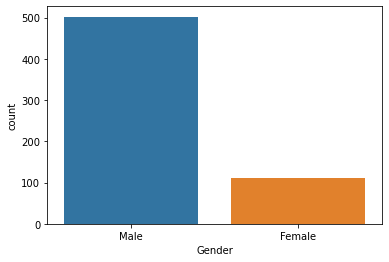

In [95]:
sns.countplot(df['Gender'])

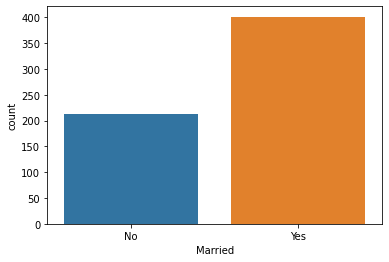

In [96]:
sns.countplot(df['Married'])

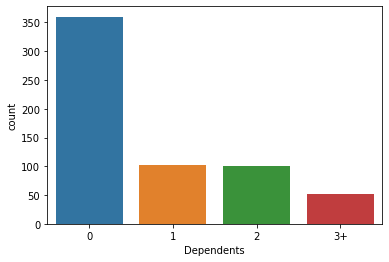

In [97]:
sns.countplot(df['Dependents'])

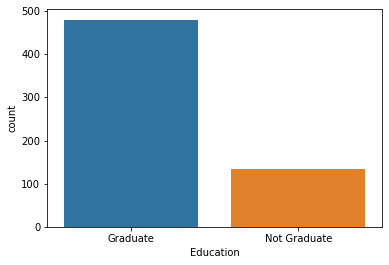

In [98]:
sns.countplot(df['Education'])

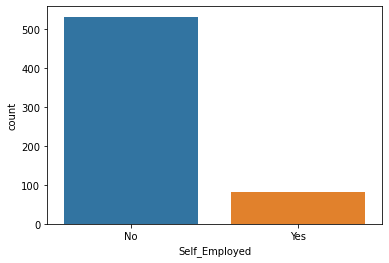

In [99]:
sns.countplot(df['Self_Employed'])

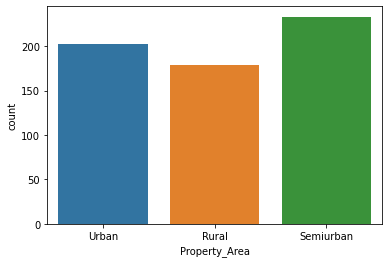

In [100]:
sns.countplot(df['Property_Area'])

# Numerical vis

In [101]:
## creation of new attributes: Total income
df['Total_Income']=df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [111]:
## log Transformation:

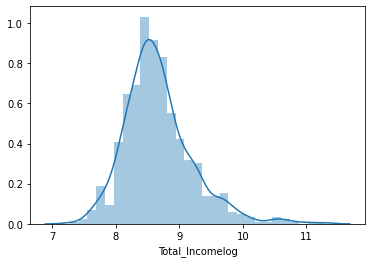

In [112]:
df['Total_Incomelog']=np.log(df['Total_Income']) 
sns.distplot(df['Total_Incomelog'])

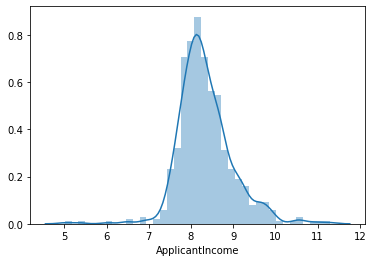

In [104]:
sns.distplot(df['ApplicantIncome'])

In [105]:
# apply log transformation to the attribute
df['ApplicantIncomelog']=np.log(df['ApplicantIncome'])

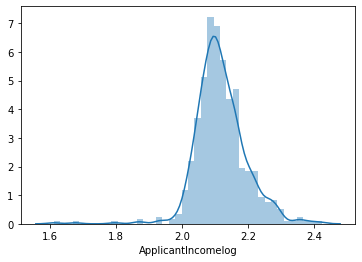

In [106]:
sns.distplot(df['ApplicantIncomelog'])

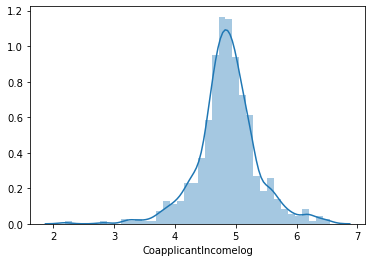

In [107]:
df['CoapplicantIncomelog']=np.log(df['LoanAmount']) 
sns.distplot(df['CoapplicantIncomelog'])

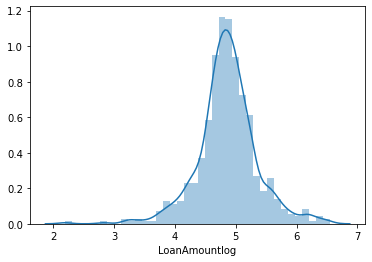

In [108]:
df['LoanAmountlog']=np.log(df['LoanAmount']) 
sns.distplot(df['LoanAmountlog'])

C:\Users\hamda\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


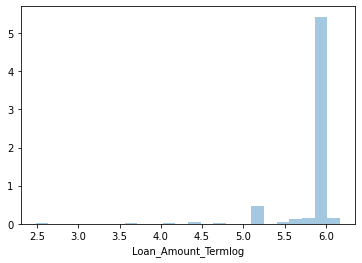

In [109]:
df['Loan_Amount_Termlog']=np.log(df['Loan_Amount_Term']) 
sns.distplot(df['Loan_Amount_Termlog'])

C:\Users\hamda\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


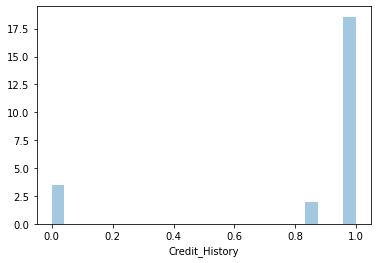

In [110]:
sns.distplot(df['Credit_History'])

In [113]:
## correlation matrix:

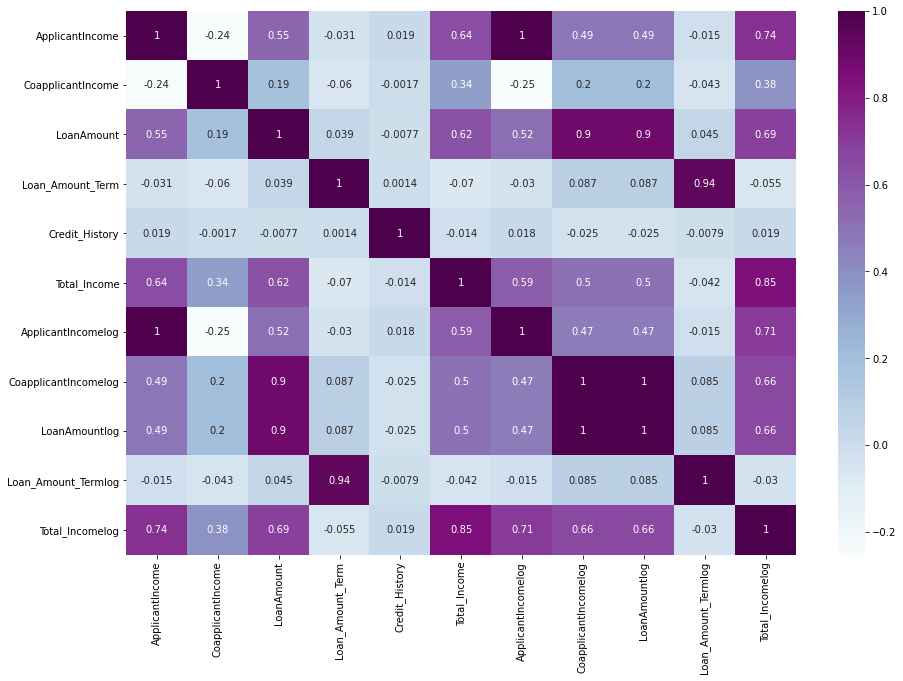

In [118]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot = True ,cmap="BuPu")

In [119]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomelog,CoapplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,Total_Incomelog
0,LP001002,Male,No,0,Graduate,No,8.674026,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,2.160333,4.986426,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,8.430109,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,2.131810,4.852030,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,2.080237,4.189655,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,2.061368,4.787492,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,8.699515,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,2.163267,4.948760,4.948760,5.886104,8.699515


In [120]:
## drop unnecessary columns:
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID','CoapplicantIncomelog']
df=df.drop(columns=cols,axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,Total_Incomelog
0,Male,No,0,Graduate,No,1.0,Urban,Y,2.160333,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,2.131810,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,2.080237,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,2.061368,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,2.163267,4.948760,5.886104,8.699515


In [128]:
## label encoding:
from sklearn.preprocessing import LabelEncoder 
cols=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status","Dependents"]
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])

In [129]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_Termlog,Total_Incomelog
0,1,0,0,0,0,1.0,2,1,2.160333,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,2.131810,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,2.080237,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,2.061368,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,2.163267,4.948760,5.886104,8.699515


In [130]:
## train test split:
#specify iput and output attributes:
X=df.drop(columns=['Loan_Status'],axis=1)
y=df['Loan_Status']

In [131]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y ,test_size=0.25,random_state=42)

In [139]:
## Model training:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [140]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

C:\Users\hamda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hamda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Accuracy is 77.27272727272727
Cross validation is 80.9462881514061


In [141]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 72.07792207792207
Cross validation is 71.1795281887245


In [142]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 79.22077922077922
Cross validation is 78.50593096094897


In [143]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 75.97402597402598
Cross validation is 76.87991470078634


In [144]:
## Hyper parameter Tunning:


In [147]:
model =RandomForestClassifier(n_estimators=100,min_samples_split=25,max_depth=7,max_features=1)
classify(model,X,y)

Accuracy is 77.27272727272727
Cross validation is 80.94495535119283


In [148]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [150]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[25, 29],
       [ 4, 96]], dtype=int64)

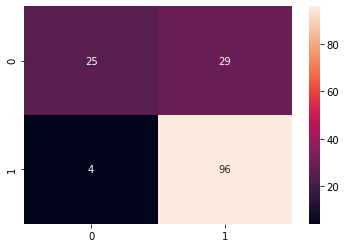

In [151]:
sns.heatmap(cm,annot=True)